In [1]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
import numpy as np
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory,StopWordRemover,ArrayDictionary
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
import graphviz

In [2]:
data_itv = pd.read_csv('Clean_Dataset.csv',delimiter=',', header=None)

In [3]:
#array of 9 behavior
bvr1=[];bvr2=[];bvr3=[];bvr4=[];bvr5=[];bvr6=[];bvr7=[];bvr8=[];bvr9=[]

bvr1.append([]);bvr1.append([])
bvr2.append([]);bvr2.append([])
bvr3.append([]);bvr3.append([])
bvr4.append([]);bvr4.append([])
bvr5.append([]);bvr5.append([])
bvr6.append([]);bvr6.append([])
bvr7.append([]);bvr7.append([])
bvr8.append([]);bvr8.append([])
bvr9.append([]);bvr9.append([])

In [4]:
#input data to ninth array
i=1
while i <=len(data_itv)-1:
    if data_itv[3][i]=='1' or data_itv[3][i]=='2' or data_itv[3][i]=='3':
        bvr1[0].append(data_itv[2][i])
        bvr1[1].append(data_itv[3][i])
    elif data_itv[4][i]=='1' or data_itv[4][i]=='2' or data_itv[4][i]=='3':
        bvr2[0].append(data_itv[2][i])
        bvr2[1].append(data_itv[4][i])
    elif data_itv[5][i]=='1' or data_itv[5][i]=='2' or data_itv[5][i]=='3':
        bvr3[0].append(data_itv[2][i])
        bvr3[1].append(data_itv[5][i])
    elif data_itv[6][i]=='1' or data_itv[6][i]=='2' or data_itv[6][i]=='3':
        bvr4[0].append(data_itv[2][i])
        bvr4[1].append(data_itv[6][i])
    elif data_itv[7][i]=='1' or data_itv[7][i]=='2' or data_itv[7][i]=='3':
        bvr5[0].append(data_itv[2][i])
        bvr5[1].append(data_itv[7][i])
    elif data_itv[8][i]=='1' or data_itv[8][i]=='2' or data_itv[8][i]=='3':
        bvr6[0].append(data_itv[2][i])
        bvr6[1].append(data_itv[8][i])
    elif data_itv[9][i]=='1' or data_itv[9][i]=='2' or data_itv[9][i]=='3':
        bvr7[0].append(data_itv[2][i])
        bvr7[1].append(data_itv[9][i])
    elif data_itv[10][i]=='1' or data_itv[10][i]=='2' or data_itv[10][i]=='3':
        bvr8[0].append(data_itv[2][i])
        bvr8[1].append(data_itv[10][i])
    elif data_itv[11][i]=='1' or data_itv[11][i]=='2' or data_itv[11][i]=='3':
        bvr9[0].append(data_itv[2][i])
        bvr9[1].append(data_itv[11][i])
    i+=1

In [5]:
# get text from dataset
# teks1=[];teks2=[];teks3=[];teks4=[];teks5=[];teks6=[];teks7=[];teks8=[];teks9=[]

# i=0
# while i<=len(bvr1[0])-1:
#     teks1.append(bvr1[0][i])
#     teks2.append(bvr2[0][i])
#     teks3.append(bvr3[0][i])
#     teks8.append(bvr8[0][i])
#     i+=1
    
# j=0
# while j<=len(bvr5[0])-1:
#     teks5.append(bvr5[0][j])
#     teks6.append(bvr6[0][j])
#     j+=1
    
# k=0
# while k<=len(bvr4[0])-1:
#     teks4.append(bvr4[0][k])
#     teks7.append(bvr7[0][k])
#     k+=1
    
# m=0
# while m<=len(bvr9[0])-1:
#     teks9.append(bvr9[0][m])
#     m+=1

In [6]:
# delete some word from liststopword and add to liststopword
# fact = StopWordRemoverFactory()
# list_stopword = fact.get_stop_words()
# remove_stopword=['aku','apabila','balik','bisa','bila','bertanya','biasa','biasanya','belum','baik','bekerja','berkeinginan',
#                 'berlebihan','bertanya','bertanya-tanya','bukan','cara','caranya','diri','dapat','dikerjakan','diperlukan',
#                 'enggak','harus','jawab','jangan','jika','kerja','kepada','kalau','lebih','melakukan','mau','mungkin','masalah',
#                 'masalahnya','namun','orang','penting','saya','sudah','sendiri','tadi','terlebih','tidak','tanya','yang']
# for x in remove_stopword:
#     for y in list_stopword:
#         if x==y:
#             list_stopword.remove(y)

# add_stopword=['mah','gitu']
# update_stopword=list_stopword+add_stopword
# dictionary=ArrayDictionary(update_stopword)

In [7]:
print(len(bvr1[0]))
print(len(bvr2[0]))
print(len(bvr3[0]))
print(len(bvr4[0]))
print(len(bvr5[0]))
print(len(bvr6[0]))
print(len(bvr7[0]))
print(len(bvr8[0]))
print(len(bvr9[0]))

51
51
51
46
48
48
47
49
49


In [8]:
#preprocessing casefolding and remove punctuation phase
for j in range(len(bvr1[0])):
    bvr1[0][j]=bvr1[0][j].translate(str.maketrans('','',string.punctuation)).lower()
    bvr2[0][j]=bvr2[0][j].translate(str.maketrans('','',string.punctuation)).lower()
    bvr3[0][j]=bvr3[0][j].translate(str.maketrans('','',string.punctuation)).lower()
    
for p in range(len(bvr4[0])):
    bvr4[0][p]=bvr4[0][p].translate(str.maketrans('','',string.punctuation)).lower()
    
for k in range(len(bvr5[0])):
    bvr5[0][k]=bvr5[0][k].translate(str.maketrans('','',string.punctuation)).lower()
    bvr6[0][k]=bvr6[0][k].translate(str.maketrans('','',string.punctuation)).lower()
    
for m in range(len(bvr7[0])):
    bvr7[0][m]=bvr7[0][m].translate(str.maketrans('','',string.punctuation)).lower()
    
for n in range(len(bvr8[0])):
    bvr8[0][n]=bvr8[0][n].translate(str.maketrans('','',string.punctuation)).lower()
    bvr9[0][n]=bvr9[0][n].translate(str.maketrans('','',string.punctuation)).lower()

In [9]:
# preprocessing stopword removal phase
# stopword=StopWordRemover(dictionary)
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
for word1 in range(len(bvr1[0])):
    useword1=stopword.remove(bvr1[0][word1])
    bvr1[0][word1]=useword1
    useword2=stopword.remove(bvr2[0][word1])
    bvr2[0][word1]=useword2
    useword3=stopword.remove(bvr3[0][word1])
    bvr3[0][word1]=useword3
    
for word3 in range(len(bvr4[0])):
    useword4=stopword.remove(bvr4[0][word3])
    bvr4[0][word3]=useword4
    
for word2 in range(len(bvr5[0])):
    useword5=stopword.remove(bvr5[0][word2])
    bvr5[0][word2]=useword5
    useword6=stopword.remove(bvr6[0][word2])
    bvr6[0][word2]=useword6
    
for word5 in range(len(bvr7[0])):
    useword7=stopword.remove(bvr7[0][word5])
    bvr7[0][word5]=useword7
    
for word4 in range(len(bvr8[0])):
    useword8=stopword.remove(bvr8[0][word4])
    bvr8[0][word4]=useword8
    useword9=stopword.remove(bvr9[0][word4])
    bvr9[0][word4]=useword9

In [10]:
# preprocessing stemming phase

factory=StemmerFactory()
stemmer=factory.create_stemmer()
for bword1 in range(len(bvr1[0])):
    stem1=stemmer.stem(bvr1[0][bword1])
    bvr1[0][bword1]=stem1
    stem2=stemmer.stem(bvr2[0][bword1])
    bvr2[0][bword1]=stem2
    stem3=stemmer.stem(bvr3[0][bword1])
    bvr3[0][bword1]=stem3
    
for bword3 in range(len(bvr4[0])):
    stem4=stemmer.stem(bvr4[0][bword3])
    bvr4[0][bword3]=stem4
    
for bword2 in range(len(bvr5[0])):
    stem5=stemmer.stem(bvr5[0][bword2])
    bvr5[0][bword2]=stem5
    stem6=stemmer.stem(bvr6[0][bword2])
    bvr6[0][bword2]=stem6
    
for bword5 in range(len(bvr7[0])):
    stem7=stemmer.stem(bvr7[0][bword5])
    bvr7[0][bword5]=stem7
    
for bword4 in range(len(bvr8[0])):
    stem8=stemmer.stem(bvr8[0][bword4])
    bvr8[0][bword4]=stem8
    stem9=stemmer.stem(bvr9[0][bword4])
    bvr9[0][bword4]=stem9

In [11]:
vectorizer = TfidfVectorizer()
# extract1_train = vectorizer.fit_transform(bv1T_train)
# extract1_test = vectorizer.fit_transform(bv1T_test)

# extract2_train = vectorizer.fit_transform(bv2T_train)
# extract2_test = vectorizer.fit_transform(bv2T_test)

# extract3_train = vectorizer.fit_transform(bv3T_train)
# extract3_test = vectorizer.fit_transform(bv3T_test)

# extract4_train = vectorizer.fit_transform(bv4T_train)
# extract4_test = vectorizer.fit_transform(bv4T_test)

# extract5_train = vectorizer.fit_transform(bv5T_train)
# extract5_test = vectorizer.fit_transform(bv5T_test)

# extract6_train = vectorizer.fit_transform(bv6T_train)
# extract6_test = vectorizer.fit_transform(bv6T_test)

# extract7_train = vectorizer.fit_transform(bv7T_train)
# extract7_test = vectorizer.fit_transform(bv7T_test)

# extract8_train = vectorizer.fit_transform(bv8T_train)
# extract8_test = vectorizer.fit_transform(bv8T_test)

# extract9_train = vectorizer.fit_transform(bv9T_train)
# extract9_test = vectorizer.fit_transform(bv9T_test)

extract1 = vectorizer.fit_transform(bvr1[0])
extract2 = vectorizer.fit_transform(bvr2[0])
extract3 = vectorizer.fit_transform(bvr3[0])
extract4 = vectorizer.fit_transform(bvr4[0])
extract5 = vectorizer.fit_transform(bvr5[0])
extract6 = vectorizer.fit_transform(bvr6[0])
extract7 = vectorizer.fit_transform(bvr7[0])
extract8 = vectorizer.fit_transform(bvr8[0])
extract9 = vectorizer.fit_transform(bvr9[0])

In [12]:
# split dataset
bv1T_train, bv1T_test, bv1C_train, bv1C_test= train_test_split(extract1, bvr1[1], test_size=0.33)
bv2T_train, bv2T_test, bv2C_train, bv2C_test= train_test_split(extract2, bvr2[1], test_size=0.33)
bv3T_train, bv3T_test, bv3C_train, bv3C_test= train_test_split(extract3, bvr3[1], test_size=0.33)
bv4T_train, bv4T_test, bv4C_train, bv4C_test= train_test_split(extract4, bvr4[1], test_size=0.33)
bv5T_train, bv5T_test, bv5C_train, bv5C_test= train_test_split(extract5, bvr5[1], test_size=0.33)
bv6T_train, bv6T_test, bv6C_train, bv6C_test= train_test_split(extract6, bvr6[1], test_size=0.33)
bv7T_train, bv7T_test, bv7C_train, bv7C_test= train_test_split(extract7, bvr7[1], test_size=0.33)
bv8T_train, bv8T_test, bv8C_train, bv8C_test= train_test_split(extract8, bvr8[1], test_size=0.33)
bv9T_train, bv9T_test, bv9C_train, bv9C_test= train_test_split(extract9, bvr9[1], test_size=0.33)

In [13]:
#turn data train to vector to create model classifier
datatrain1=bv1T_train.toarray()
datatrain2=bv2T_train.toarray()
datatrain3=bv3T_train.toarray()
datatrain4=bv4T_train.toarray()
datatrain5=bv5T_train.toarray()
datatrain6=bv6T_train.toarray()
datatrain7=bv7T_train.toarray()
datatrain8=bv8T_train.toarray()
datatrain9=bv9T_train.toarray()

datatest1=bv1T_test.toarray()
datatest2=bv2T_test.toarray()
datatest3=bv3T_test.toarray()
datatest4=bv4T_test.toarray()
datatest5=bv5T_test.toarray()
datatest6=bv6T_test.toarray()
datatest7=bv7T_test.toarray()
datatest8=bv8T_test.toarray()
datatest9=bv9T_test.toarray()

In [14]:
# training data to create model classifier with decision tree
clf_dectree1=tree.DecisionTreeClassifier()
clf_dectree2=tree.DecisionTreeClassifier()
clf_dectree3=tree.DecisionTreeClassifier()
clf_dectree4=tree.DecisionTreeClassifier()
clf_dectree5=tree.DecisionTreeClassifier()
clf_dectree6=tree.DecisionTreeClassifier()
clf_dectree7=tree.DecisionTreeClassifier()
clf_dectree8=tree.DecisionTreeClassifier()
clf_dectree9=tree.DecisionTreeClassifier()

clf_dectree1=clf_dectree1.fit(datatrain1,bv1C_train)
clf_dectree2=clf_dectree2.fit(datatrain2,bv2C_train)
clf_dectree3=clf_dectree3.fit(datatrain3,bv3C_train)
clf_dectree4=clf_dectree4.fit(datatrain4,bv4C_train)
clf_dectree5=clf_dectree5.fit(datatrain5,bv5C_train)
clf_dectree6=clf_dectree6.fit(datatrain6,bv6C_train)
clf_dectree7=clf_dectree7.fit(datatrain7,bv7C_train)
clf_dectree8=clf_dectree8.fit(datatrain8,bv8C_train)
clf_dectree9=clf_dectree9.fit(datatrain9,bv9C_train)

[Text(265.5310344827586, 203.85, 'X[500] <= 0.181\ngini = 0.604\nsamples = 34\nvalue = [17, 12, 5]'),
 Text(242.44137931034481, 176.67000000000002, 'X[141] <= 0.065\ngini = 0.58\nsamples = 30\nvalue = [17, 8, 5]'),
 Text(196.26206896551724, 149.49, 'X[220] <= 0.256\ngini = 0.474\nsamples = 25\nvalue = [17, 6, 2]'),
 Text(173.17241379310343, 122.31, 'X[254] <= 0.093\ngini = 0.416\nsamples = 23\nvalue = [17, 4, 2]'),
 Text(115.44827586206895, 95.13, 'X[172] <= 0.063\ngini = 0.322\nsamples = 21\nvalue = [17, 3, 1]'),
 Text(69.26896551724138, 67.94999999999999, 'X[249] <= 0.099\ngini = 0.188\nsamples = 19\nvalue = [17, 2, 0]'),
 Text(46.179310344827584, 40.77000000000001, 'X[86] <= 0.21\ngini = 0.105\nsamples = 18\nvalue = [17, 1, 0]'),
 Text(23.089655172413792, 13.590000000000003, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0]'),
 Text(69.26896551724138, 13.590000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(92.35862068965517, 40.77000000000001, 'gini = 0.0\nsamples = 1\n

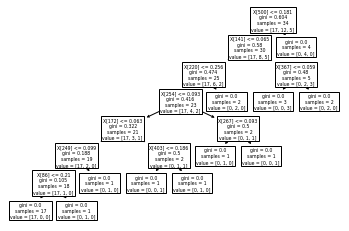

In [21]:
tree.plot_tree(clf_dectree1)

In [16]:
# test model classification with decision tree
testdata1=clf_dectree1.predict(datatest1)
testdata2=clf_dectree2.predict(datatest2)
testdata3=clf_dectree3.predict(datatest3)
testdata4=clf_dectree4.predict(datatest4)
testdata5=clf_dectree5.predict(datatest5)
testdata6=clf_dectree6.predict(datatest6)
testdata7=clf_dectree7.predict(datatest7)
testdata8=clf_dectree8.predict(datatest8)
testdata9=clf_dectree9.predict(datatest9)

In [17]:
# training data to create model classifier with Multinomial Naive Bayes
clf_MNB1=MultinomialNB()
clf_MNB2=MultinomialNB()
clf_MNB3=MultinomialNB()
clf_MNB4=MultinomialNB()
clf_MNB5=MultinomialNB()
clf_MNB6=MultinomialNB()
clf_MNB7=MultinomialNB()
clf_MNB8=MultinomialNB()
clf_MNB9=MultinomialNB()

clf_MNB1=clf_MNB1.fit(datatrain1,bv1C_train)
clf_MNB2=clf_MNB2.fit(datatrain2,bv2C_train)
clf_MNB3=clf_MNB3.fit(datatrain3,bv3C_train)
clf_MNB4=clf_MNB4.fit(datatrain4,bv4C_train)
clf_MNB5=clf_MNB5.fit(datatrain5,bv5C_train)
clf_MNB6=clf_MNB6.fit(datatrain6,bv6C_train)
clf_MNB7=clf_MNB7.fit(datatrain7,bv7C_train)
clf_MNB8=clf_MNB8.fit(datatrain8,bv8C_train)
clf_MNB9=clf_MNB9.fit(datatrain9,bv9C_train)

In [18]:
# test model classification with Multinomial Naive Bayes

test_MNB1=clf_MNB1.predict(datatest1)
test_MNB2=clf_MNB2.predict(datatest2)
test_MNB3=clf_MNB3.predict(datatest3)
test_MNB4=clf_MNB4.predict(datatest4)
test_MNB5=clf_MNB5.predict(datatest5)
test_MNB6=clf_MNB6.predict(datatest6)
test_MNB7=clf_MNB7.predict(datatest7)
test_MNB8=clf_MNB8.predict(datatest8)
test_MNB9=clf_MNB9.predict(datatest9)

In [19]:
# accuracy decision tree model

acc_dectree1=clf_dectree1.score(datatest1,bv1C_test)
acc_dectree2=clf_dectree2.score(datatest2,bv2C_test)
acc_dectree3=clf_dectree3.score(datatest3,bv3C_test)
acc_dectree4=clf_dectree4.score(datatest4,bv4C_test)
acc_dectree5=clf_dectree5.score(datatest5,bv5C_test)
acc_dectree6=clf_dectree6.score(datatest6,bv6C_test)
acc_dectree7=clf_dectree7.score(datatest7,bv7C_test)
acc_dectree8=clf_dectree8.score(datatest8,bv8C_test)
acc_dectree9=clf_dectree9.score(datatest9,bv9C_test)

print('accuracy for decision tree:')
print(acc_dectree1)
print(acc_dectree2)
print(acc_dectree3)
print(acc_dectree4)
print(acc_dectree5)
print(acc_dectree6)
print(acc_dectree7)
print(acc_dectree8)
print(acc_dectree9)

accuracy for decision tree:
0.4117647058823529
0.35294117647058826
0.23529411764705882
0.6875
0.5625
0.3125
0.4375
0.35294117647058826
0.35294117647058826


In [20]:
# accuracy Multinomial Naive Bayes model

acc_MNB1=clf_MNB1.score(datatest1,bv1C_test)
acc_MNB2=clf_MNB2.score(datatest2,bv2C_test)
acc_MNB3=clf_MNB3.score(datatest3,bv3C_test)
acc_MNB4=clf_MNB4.score(datatest4,bv4C_test)
acc_MNB5=clf_MNB5.score(datatest5,bv5C_test)
acc_MNB6=clf_MNB6.score(datatest6,bv6C_test)
acc_MNB7=clf_MNB7.score(datatest7,bv7C_test)
acc_MNB8=clf_MNB8.score(datatest8,bv8C_test)
acc_MNB9=clf_MNB9.score(datatest9,bv9C_test)

print('accuracy for Multinomial NB :')
print(acc_MNB1)
print(acc_MNB2)
print(acc_MNB3)
print(acc_MNB4)
print(acc_MNB5)
print(acc_MNB6)
print(acc_MNB7)
print(acc_MNB8)
print(acc_MNB9)

accuracy for Multinomial NB :
0.35294117647058826
0.35294117647058826
0.5294117647058824
0.625
0.5625
0.5625
0.5625
0.35294117647058826
0.47058823529411764
